In [1]:
import os
import jieba
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
doc_folder = "/Users/liuzhixin/Documents/硕士研究生/课程文件/第二学期/文本数据挖掘/外交部发言文稿（按文档）"
stopwords_file = "/Users/liuzhixin/Documents/硕士研究生/课程文件/第二学期/文本数据挖掘/workshop1/stopwords.txt"

In [3]:
with open(stopwords_file, 'r', encoding='utf-8') as f:
    stopwords = f.read().splitlines()

In [4]:
def read_doc(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

In [5]:
doc_files = [os.path.join(doc_folder, file) for file in os.listdir(doc_folder) if file.endswith('.txt')]

In [6]:
corpus = []
for file in doc_files:
    text = read_doc(file)
    words = [word for word in jieba.cut(text) if word not in stopwords]
    corpus.append(" ".join(words))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/qy/l6pd6hxj5gn51xzk2nltjm2h0000gn/T/jieba.cache
Loading model cost 0.311 seconds.
Prefix dict has been built successfully.


In [7]:
word_counter = Counter(" ".join(corpus).split())

In [18]:
top_100_words = word_counter.most_common(100)
print("词频前100的词：")
for word, count in top_100_words:
    print(word, count)

词频前100的词：
中国 29018
中方 23649
美国 11449
国家 11226
国际 10314
合作 10264
发展 9700
对此 7283
美方 6671
有何 6599
评论 5743
疫情 5735
月 5509
日 5444
全球 5260
世界 4638
社会 4374
报道 4327
汪文斌 4285
推动 3948
维护 3906
关系 3886
经济 3874
支持 3838
人民 3771
赵立坚 3742
和平 3638
稳定 3629
地区 3506
提供 3487
一个 3178
组织 3098
政治 3072
人权 3013
反对 2976
外长 2877
外交部 2866
发言人 2749
各国 2748
联合国 2689
原则 2676
相关 2638
新 2596
希望 2594
企业 2519
主席 2515
情况 2511
新冠 2504
称 2482
作出 2424
总统 2391
各方 2373
立场 2354
美 2256
香港 2215
发布 2208
疫苗 2179
介绍 2177
台湾 2155
停止 2145
国 2118
包括 2111
阿富汗 2053
会议 1994
日本 1948
新疆 1947
习近平 1929
领域 1883
应 1882
利益 1864
媒体 1857
毛宁 1833
抗疫 1789
持续 1744
推进 1742
对话 1740
应对 1737
进一步 1705
领导人 1700
措施 1697
报告 1693
信息 1670
肺炎 1641
工作 1638
请问 1624
提出 1620
解决 1606
回应 1579
提到 1560
战略 1559
世卫 1536
一道 1528
乌克兰 1526
想 1524
沟通 1508
中国政府 1499
倡议 1494
始终 1485
活动 1477
政策 1471


In [8]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
features = vectorizer.get_feature_names_out()

In [19]:
tfidf_values = tfidf_matrix.sum(axis=0).A1
tfidf_scores = [(word, tfidf_values[index]) for word, index in vectorizer.vocabulary_.items()]
top_100_tfidf = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:100]
print("TF-IDF前100的词：")
for word, score in top_100_tfidf:
    print(word, score)

TF-IDF前100的词：
中国 172.15220056888964
中方 142.57255407723625
美国 68.37705822811289
国家 66.59350595131517
合作 63.0464769237521
国际 61.91413424730535
发展 60.87152123383656
汪文斌 53.270836605994944
赵立坚 47.68954139793186
疫情 46.92287646673769
对此 44.5495958122601
美方 43.5607738989124
有何 40.798398011263636
毛宁 39.60462474738399
全球 35.91832373242102
评论 35.452614951023946
世界 30.962145584978025
人权 30.523451642565735
经济 29.630982328745137
社会 27.461714520314263
关系 27.118563456029797
报道 27.11273422462957
推动 26.697555181148893
疫苗 26.57579254459648
阿富汗 25.933950604080582
维护 25.685423314996665
香港 25.530453700065838
和平 25.43329322661153
支持 24.943103392607163
人民 24.914739366411812
外长 24.79255323589407
地区 24.547934502266607
稳定 24.45760119170754
组织 24.033466971814487
提供 23.5730565042709
乌克兰 22.223887586174566
企业 22.162079484745593
新冠 22.128844230286774
一个 21.747545602291527
新疆 21.643252993079557
联合国 21.395554355539687
台湾 21.343784456005753
政治 20.94084158298364
主席 20.474663400173526
反对 20.285064352825476
非洲 19.9650078

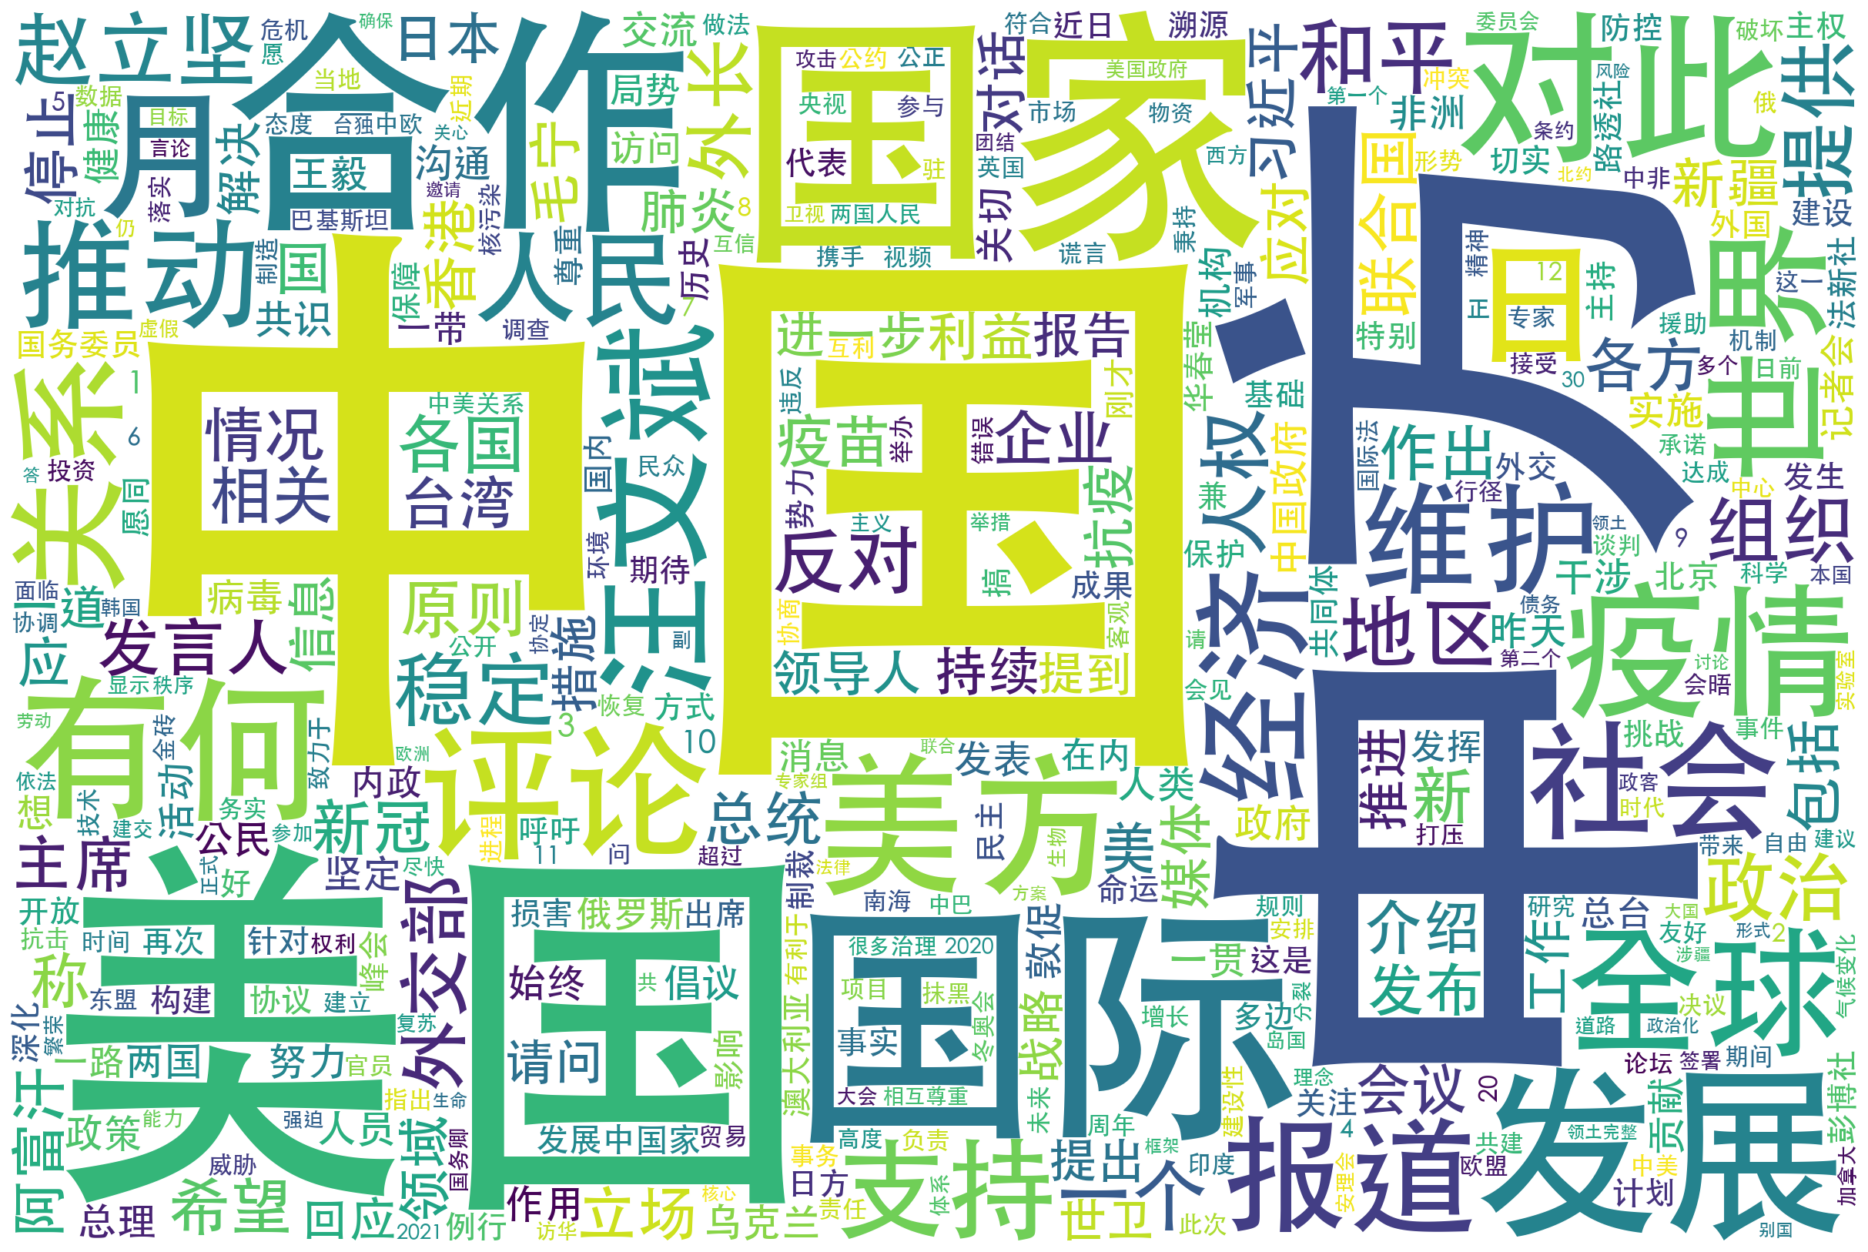

In [17]:
wordcloud = WordCloud(width=2400, height=1600, background_color='white',max_words=400,font_path="/Library/Fonts/STHeiti Medium.ttc").generate_from_frequencies(word_counter)
plt.figure(figsize=(24, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.pdf", format="pdf", dpi=300)  
plt.show()